<a href="https://colab.research.google.com/github/trndsttr7777/GammaTelescope-fcc-Magic-example.ipynb/blob/main/%E2%80%9CGammaTelescope_fcc_Magic_example_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from pandas import plotting
# plt.style.use('seaborn')
# 这个会报错，说plt没有seaborn这个style

# 导入 seaborn，在使用其风格之前
import seaborn as sns
# 应用 seaborn 风格
sns.set_theme()
sns.set_style("whitegrid")

# sns.set_context("notebook")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics



Dataset:
Dua, D. and Graff, c. (2019). Uc! Machine Learning Repository lhttp:/archive.ics.uci.edu/ml. irvine, CA: University of california, School of
Information and Computer Science.
Donated by: P Savicky institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [5]:
cols = ["fLength", "fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data" , names= cols ,usecols=[1])
df

,fWidth
0,16.0021
1,11.7235
2,136.0310
3,9.5728
4,30.9205
...,...
19015,10.9170
19016,6.7020
19017,47.5305
19018,76.9018


In [ ]:
df["class"].unique()

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### take a glance

In [12]:
iris = pd.read_csv("/content/sample_data/california_housing_test.csv")
iris

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [15]:
iris.head(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [24]:
iris.columns # 和上面那个代码类似，但有点不一样

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


longitude


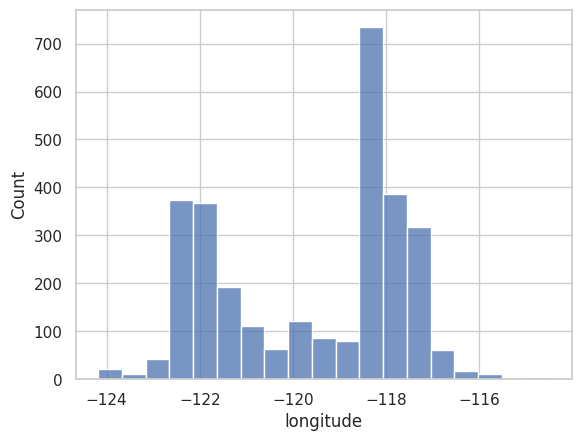

latitude


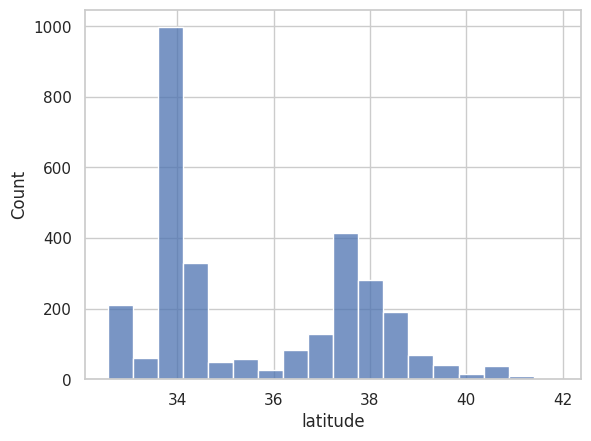

housing_median_age


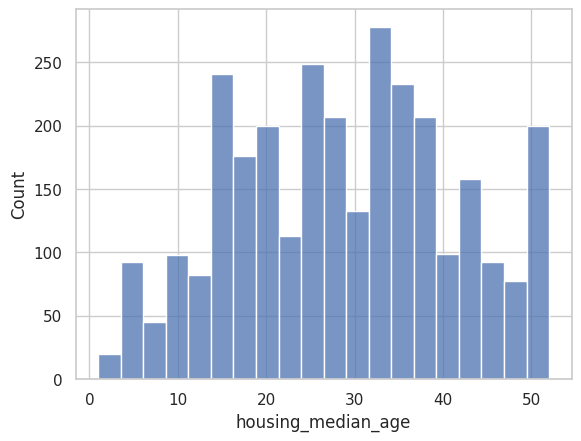

total_rooms


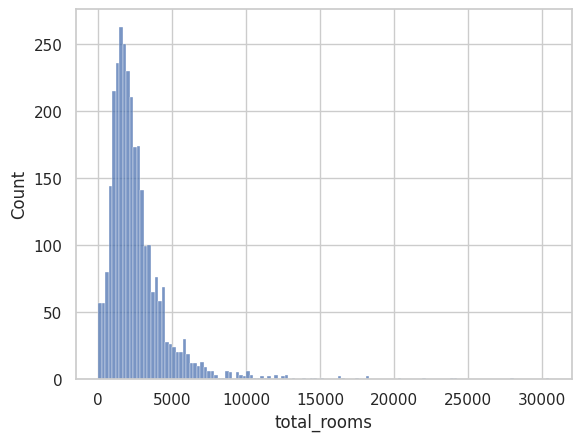

total_bedrooms


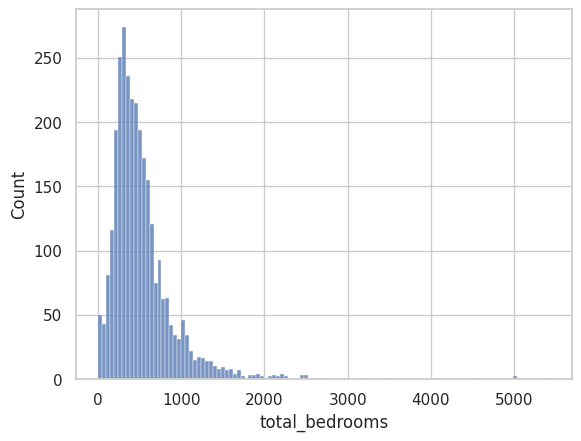

population


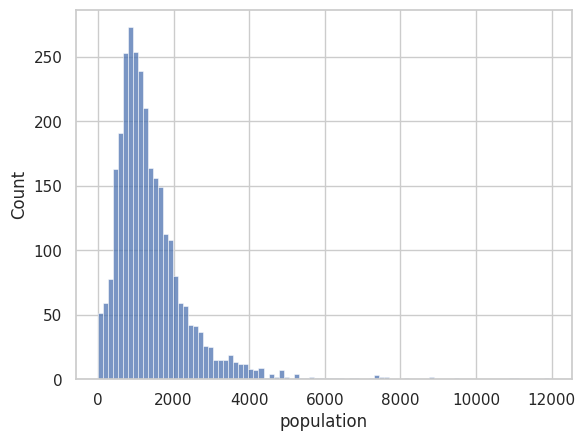

households


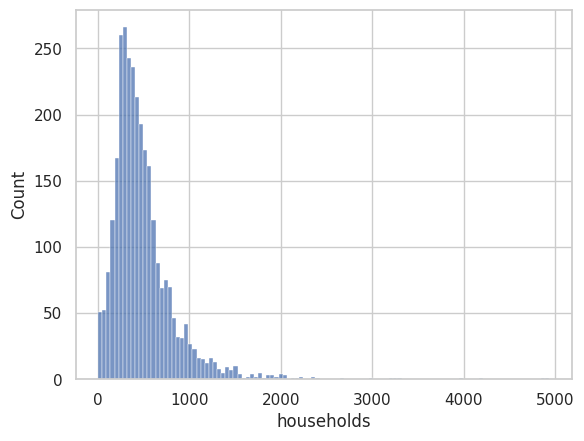

median_income


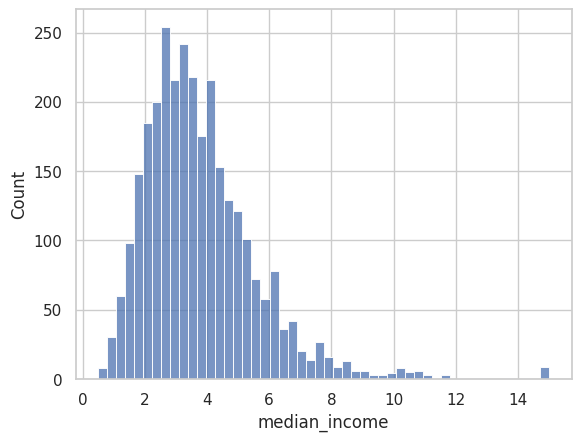

median_house_value


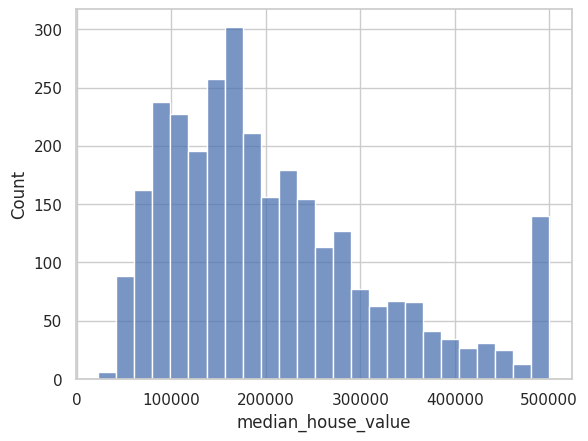

In [35]:
# cols = iris.columns # 这里这两那个效果一样
cols = iris.head(0)
for label in cols[:-1]:
  print(label) # print输出的不居中，不好看，但是可以看
  # 好消息是sns.histplot会自动在图片下方居中标明，好看
  sns.histplot(iris[label])
  plt.show()

ValueError: Could not interpret value `Species` for `x`. An entry with this name does not appear in `data`.

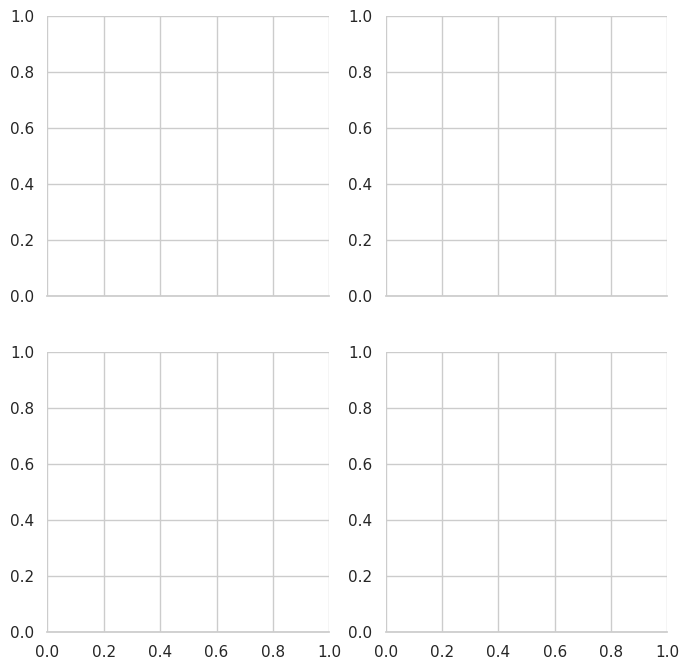

In [21]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14']
# 绘制 Violinplot 小钢琴图
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidthCm', data=iris, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLengthCm', data=iris, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=iris, palette=antV, ax=axes[1, 1])
plt.show()

fLength


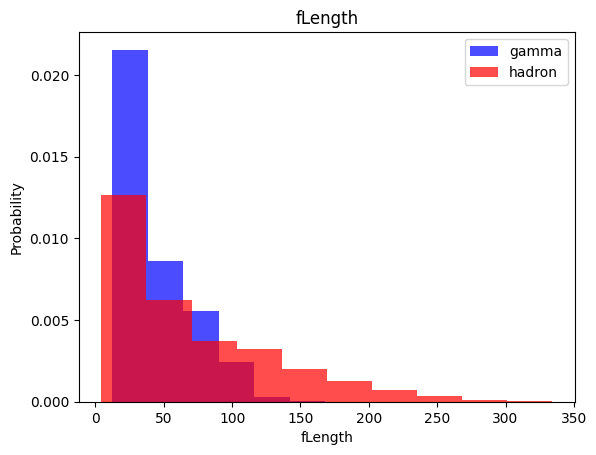

fWidth


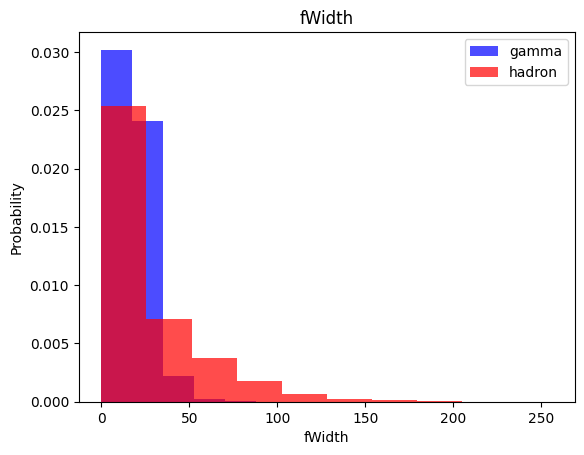

fSize


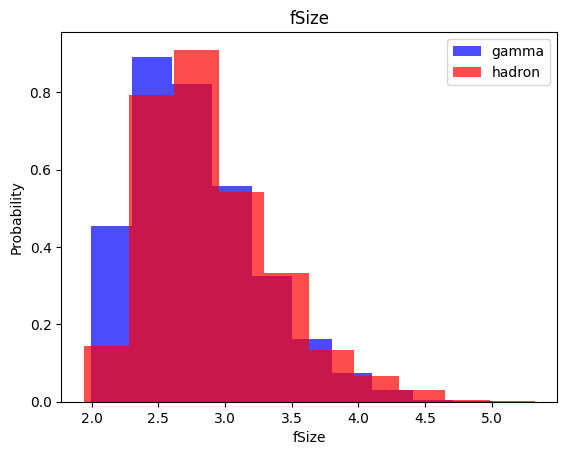

fConc


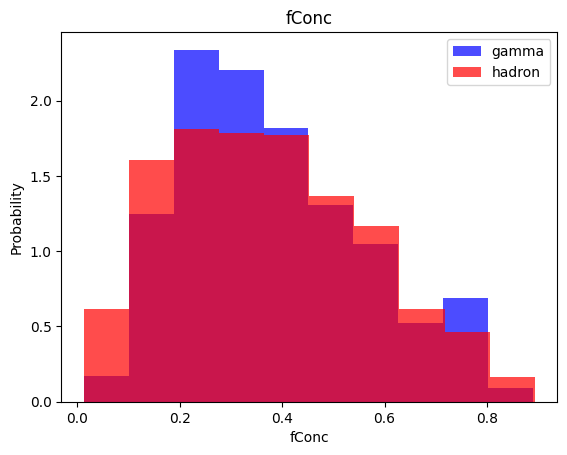

fConc1


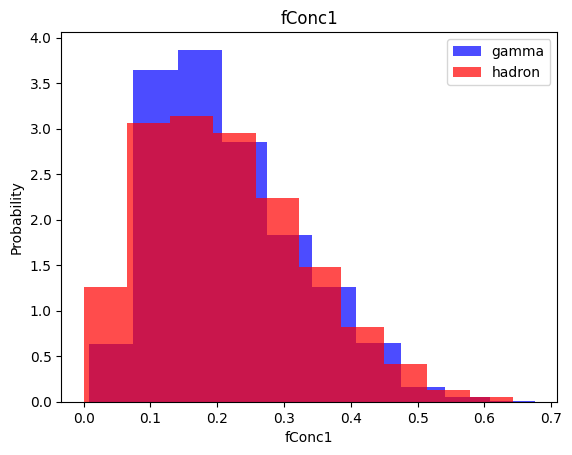

fAsym


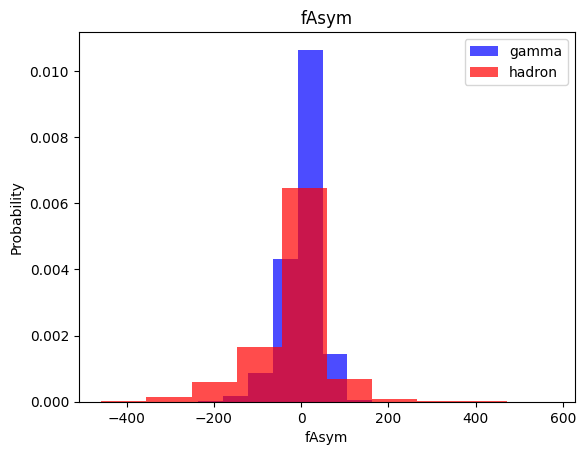

fM3Long


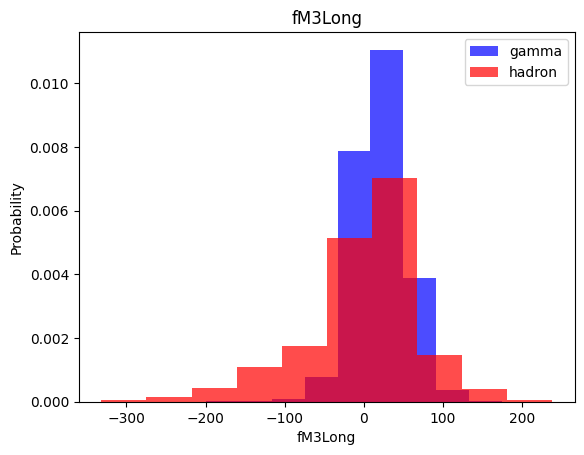

fM3Trans


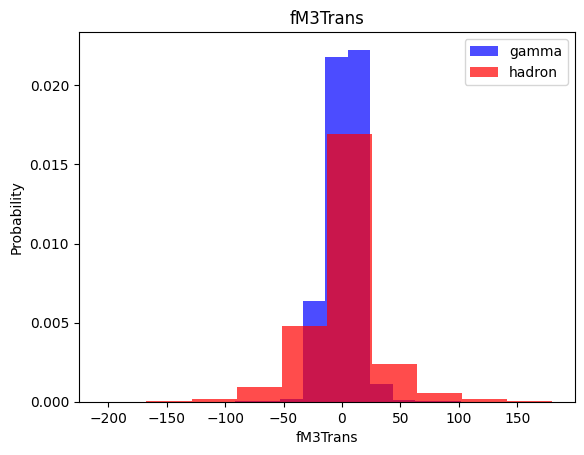

fAlpha


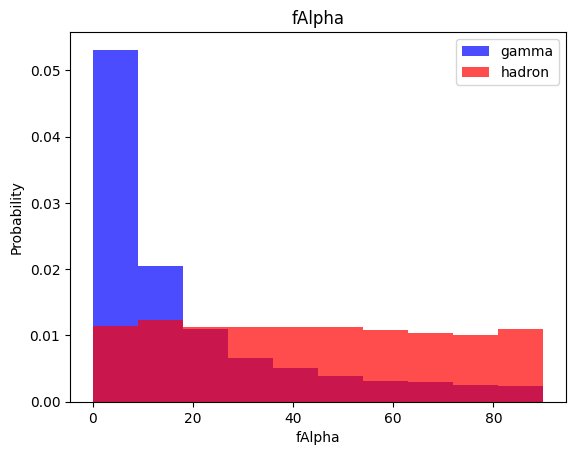

fDist


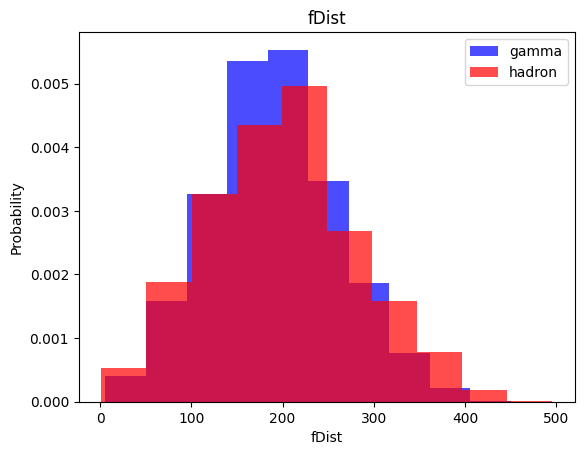

In [ ]:
for label in cols[:-1]:# 遍历
    print(label)
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    # hist用于绘制直方图，第一个参数是分类，后面的是颜色、标签，应该看得懂；
    # 最后一个参数，density是概率密度，=true时显示密度，否则显示数量，你可以把他删掉看看效果
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
# 第二个参数是分开的位置，也就是0.6的位置和0.8的位置，共分成3份
# 第一个参数看不懂

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


### 下面的是我的一些尝试

In [ ]:
pd.read_csv("magic04.names", header=None, delimiter=':')

,0,1
0,1. Title of Database,MAGIC gamma telescope data 2004
1,2. Sources,NaN
2,(a) Original owner of the database,NaN
3,R. K. Bock,NaN
4,Major Atmospheric Gamma Imaging Cherenk...,NaN
...,...,...
82,event as background. For comparison of diff...,NaN
83,has to be used. The relevant points on this...,NaN
84,probability of accepting a background event...,NaN
85,following thresholds,"0.01, 0.02, 0.05, 0.1, 0.2 depending on the r..."


NameError: name 'sns' is not defined

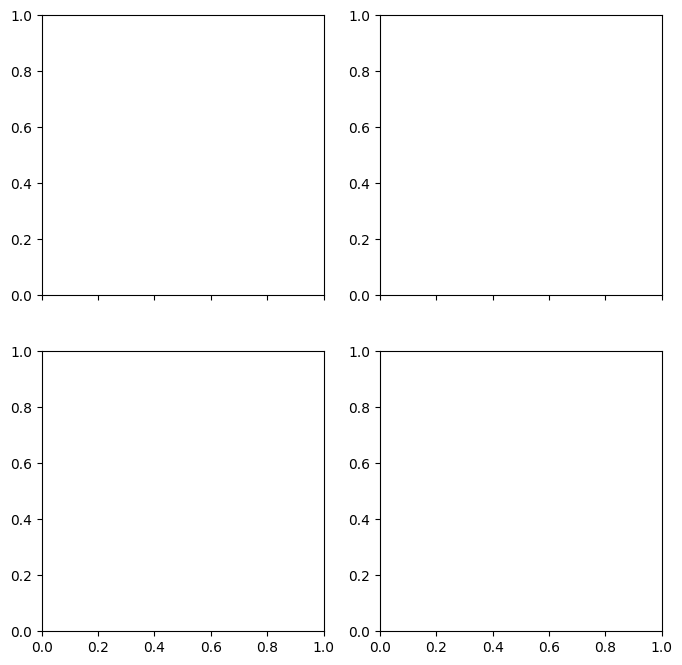

In [ ]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14']
# 绘制 Violinplot 小钢琴图
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidthCm', data=iris, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLengthCm', data=iris, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=iris, palette=antV, ax=axes[1, 1])
plt.show()

In [1]:
"""!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
"""

# Assuming 'class' is the categorical column in your 'magic04.data'
# and 'fLength', 'fWidth', 'fSize', 'fConc' are numerical columns you want to visualize
# Replace these with the actual column names you want to use

# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14']
# 绘制 Violinplot 小钢琴图
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

# Use the correct column names from your 'df' DataFrame
sns.violinplot(x='class', y='fLength', data=df, palette=antV, ax=axes[0, 0])
sns.violinplot(x='class', y='fWidth', data=df, palette=antV, ax=axes[0, 1])
sns.violinplot(x='class', y='fSize', data=df, palette=antV, ax=axes[1, 0])
sns.violinplot(x='class', y='fConc', data=df, palette=antV, ax=axes[1, 1])

plt.show()

NameError: name 'plt' is not defined

In [ ]:
for label in cols[:-1]:
    print(label)

fLength
fWidth
fSize
fConc
fConc1
fAsym
fM3Long
fM3Trans
fAlpha
fDist
